### [COVID-19 Rampage on the Stock Market. Machine Learning Comes to Explain.](https://towardsdatascience.com/covid-19-rampage-on-the-stock-market-machine-learning-comes-to-explain-3332707954af)

In [ ]:
import pandas as pd
import numpy as np
import os
import sys
from decouple import config

sys.path.append(config('PYTHONPATH'))

from sqlalchemy import create_engine
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from cargo.modeling.classifiers import DecisionTreeClassifier

In [2]:
engine = create_engine(config('ENGINE_PATH'))

In [3]:
df = pd.read_sql_table('covid', schema='research', con=engine)

In [4]:
output_notebook()
y = df['price_change']
tops, edges = np.histogram(y.dropna(), bins=78, range=(-1, 1), density=True)

p = figure(
    title="Stock Returns (Feb 12 - Mar 23, 2020)", 
    x_axis_label='Price Growth (Fraction)',
    y_axis_label='Density (%)',
    plot_height=467, 
)
p.quad(top=tops, bottom=0, left=edges[:-1], right=edges[1:], color=(230, 54, 54), line_color="white")
p.y_range.start = 0
p.xaxis.axis_label_text_font_size = '16px'
p.yaxis.axis_label_text_font_size = '16px'
p.title.text_font_size = '20pt'

show(p)

Loading BokehJS ...

In [5]:
from sklearn.impute import SimpleImputer
from sklearn import tree
si = SimpleImputer(strategy='median')
df_55 = df.copy()
df_55['target'] = (df['price_change'] < -0.55).astype(float)
X = df_55[[col for col in df_55 if df_55[col].dtype == 'float64']].copy()
X.drop(columns=['price_change', 'price_march', 'price_february', 'price'], inplace=True)
X = pd.DataFrame(si.fit_transform(X), columns = X.columns)
y = X.pop('target')
X = X.iloc[:, :]
params = {
    'max_depth': 10,
    'min_samples_leaf': 5,
    'max_leaf_nodes': 10,
}
clf = DecisionTreeClassifier(**params)
clf = clf.fit(X, y)
clf.score(X, y)

0.8518024032042724

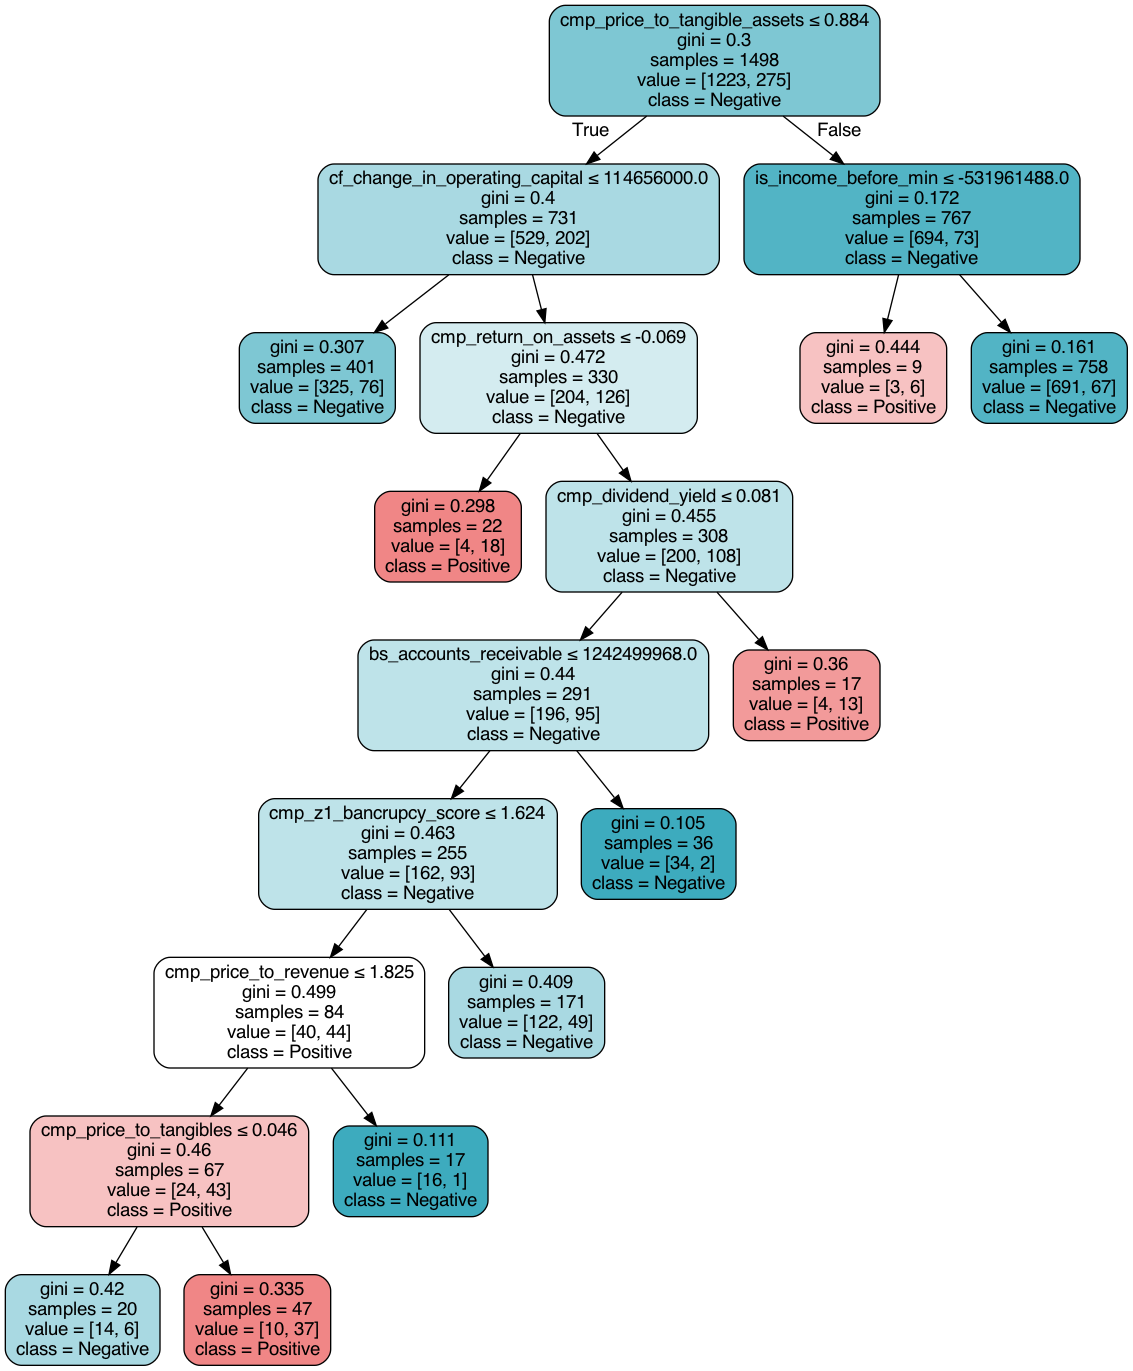

In [6]:
clf.feature_importance(X)
clf.visualize(feature_names = X.columns)